<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Project_1_Machine_Learning(Reena_Singh_Regression_with_one_variable_Regression_with_two_variables_One_hot_encoding_Forward_Backward_Ridge_Lasso)_Bike_sharing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing dataset


In [ ]:
#@title Install the 0.24 version of scikit-learn
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.8MB/s 


In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.linear_model as linear_module

In [ ]:
#@title Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-06-06 02:48:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase 100%[===================>] 273.43K  --.-KB/s    in 0.1s    

2021-06-06 02:48:49 (1.99 MB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992/279992]



In [ ]:
#@title
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#@title The description of the data.
!cat Readme.txt

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [ ]:
df = pd.read_csv('hour.csv')
df = df.set_index('instant', drop = True)
df

dteday  season  yr  mnth  ...  windspeed  casual  registered  cnt
instant                                ...                                    
1        2011-01-01       1   0     1  ...     0.0000       3          13   16
2        2011-01-01       1   0     1  ...     0.0000       8          32   40
3        2011-01-01       1   0     1  ...     0.0000       5          27   32
4        2011-01-01       1   0     1  ...     0.0000       3          10   13
5        2011-01-01       1   0     1  ...     0.0000       0           1    1
...             ...     ...  ..   ...  ...        ...     ...         ...  ...
17375    2012-12-31       1   1    12  ...     0.1642      11         108  119
17376    2012-12-31       1   1    12  ...     0.1642       8          81   89
17377    2012-12-31       1   1    12  ...     0.1642       7          83   90
17378    2012-12-31       1   1    12  ...     0.1343      13          48   61
17379    2012-12-31       1   1    12  ...     0.1343      12          37   49

[17379 rows x 16 columns]

In [ ]:
df.shape

(17379, 16)

In [ ]:
day_df = pd.read_csv('hour.csv')
day_df = day_df.set_index('instant', drop = True)
day_df

dteday  season  yr  mnth  ...  windspeed  casual  registered  cnt
instant                                ...                                    
1        2011-01-01       1   0     1  ...     0.0000       3          13   16
2        2011-01-01       1   0     1  ...     0.0000       8          32   40
3        2011-01-01       1   0     1  ...     0.0000       5          27   32
4        2011-01-01       1   0     1  ...     0.0000       3          10   13
5        2011-01-01       1   0     1  ...     0.0000       0           1    1
...             ...     ...  ..   ...  ...        ...     ...         ...  ...
17375    2012-12-31       1   1    12  ...     0.1642      11         108  119
17376    2012-12-31       1   1    12  ...     0.1642       8          81   89
17377    2012-12-31       1   1    12  ...     0.1642       7          83   90
17378    2012-12-31       1   1    12  ...     0.1343      13          48   61
17379    2012-12-31       1   1    12  ...     0.1343      12          37   49

[17379 rows x 16 columns]

Quick look at some Graphs

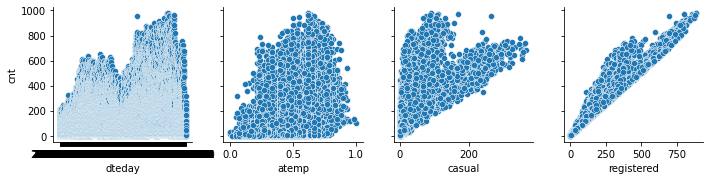

In [ ]:
sns.pairplot(df, y_vars="cnt", x_vars=["dteday", "atemp", "casual", 
                   "registered"])

Regression with one variable

First Observation

cnt vs. hr

We predict a predictor variable - hr and Response variable is cnt

split the data into training and test sets train the model on the training set check the training error and test MSE/RSE errors. get the r2 score for the fit.

In [ ]:
X = df[['hr']]
Y = df[['cnt']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [70.09516701]
slope [[10.33779217]]


In [ ]:
reg.coef_.squeeze()

array(10.33779217)

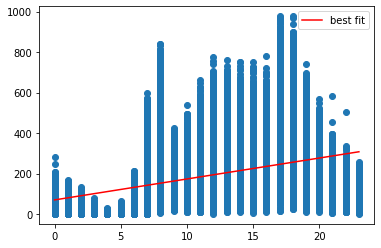

In [ ]:
plt.pyplot.scatter(df.hr, df.cnt)
plt.pyplot.plot(df.hr, df.hr*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

In [ ]:
#@title  All the regression code in one place

# test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.1560997398418289

Second Observation

cnt vs. holiday

We predict a predictor variable - holiday and Response variable is cnt

split the data into training and test sets train the model on the training set check the training error and test MSE/RSE errors. get the r2 score for the fit.

In [ ]:
X = df[['holiday']]
Y = df[['cnt']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [190.42857989]
slope [[-33.55857989]]


In [ ]:
reg.coef_.squeeze()

array(-33.55857989)

The coefficient above being negative is okay. It says it is negatively correlated.

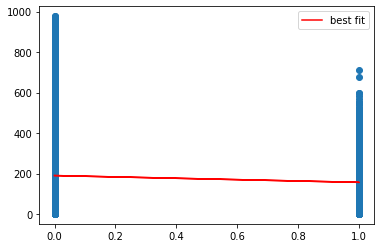

In [ ]:
plt.pyplot.scatter(df.holiday, df.cnt)
plt.pyplot.plot(df.holiday, df.holiday*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

In [ ]:
#@title  All the regression code in one place

# test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


-0.0005204270707750425

The above r-square is negative. It is a low score. It means holiday might be not a good predictor.

Third Observation

We predict a predictor variable - temp and Response variable is cnt

split the data into training and test sets train the model on the training set check the training error and test MSE/RSE errors. get the r2 score for the fit.

In [ ]:
Y = df[['cnt']]
X = df[['temp']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [-0.03559611]
slope [[381.29492226]]


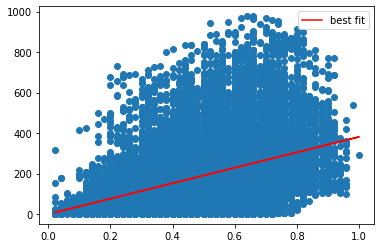

In [ ]:
plt.pyplot.scatter(df.temp, df.cnt)
plt.pyplot.plot(df.temp, df.temp*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

Prediction

Training and test data split is done by calling the train_test_split method. This method randomizes the dataset and selects a fraction sepcified by the test_size parameter.

In [ ]:
from sklearn.model_selection import train_test_split
# Split X and Y into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape) 
print("y_test shape: ",y_test.shape)


X_train shape:  (13034, 1)
y_train shape:  (13034, 1)
X_test shape:  (4345, 1)
y_test shape:  (4345, 1)


Training

We say we want a linear model by calling linear_module.LinearRegression(). We will train the model using fit() method.

The library will try to get the coefficients for the equation. y^=w0+w1⋅x1+w2⋅x2

In [ ]:
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

Training error First we will check the training error. We try to predict the y values of the training set and compare it to y_train.

This is only for demonstration. If the training error is very low but the test error is high, then we have overfitting for the training data.

In [ ]:
y_train_predict = reg.predict(X_train)

First compare the values visually.

In [ ]:
df_train_comparison = pd.DataFrame({"y_train" : y_train.cnt.values, "predicted" : y_train_predict.flatten() })

In [ ]:
df_train_comparison

y_train   predicted
0          396  129.306373
1          274  242.575559
2            2  272.780675
3          674  242.575559
4           10  174.614047
...        ...         ...
13029      537  189.716606
13030       51   83.998699
13031      101  272.780675
13032      270  250.126838
13033        3   61.344862

[13034 rows x 2 columns]

In [ ]:
from sklearn.metrics import mean_squared_error
import math

regression_train_mse = mean_squared_error(y_train_predict, y_train)
print("temp training error"," ",math.sqrt(regression_train_mse))

temp training error   164.88888554353923


Test error

In [ ]:
y_predict = reg.predict(X_test)

First let us compare the values visually.

In [ ]:
df_comparison = pd.DataFrame({"y_test" : y_test.cnt.values, "predicted" : y_predict.flatten() })

In [ ]:
df_comparison

y_test   predicted
0        389  204.819164
1        146  197.267885
2        152  129.306373
3        188  204.819164
4         62  265.229396
...      ...         ...
4340     208  151.960210
4341     144  136.857652
4342     182  204.819164
4343      25  265.229396
4344     141  151.960210

[4345 rows x 2 columns]

In [ ]:
from sklearn.metrics import mean_squared_error
import math

regression_test_mse = mean_squared_error(y_predict, y_test)
print("temp test error"," ",math.sqrt(regression_test_mse))

temp test error   168.75193336976736


Error measures

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,  y_train_predict.flatten())

0.16204914055004027

In [ ]:
r2_score(y_test, y_predict)

0.1684267007127147



What we have seen so far is that less than 10 lines of code (+5 import statements), we have been able to:

split the data into training and test sets train the model on the training set check the training error and test MSE/RSE errors. get the r2 score for the fit.

In [ ]:
#@title  All the regression code in one place

# test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.1684267007127147

Fourth Observation 

workingday Vs. cnt

We predict a predictor variable - workingday and Response variable is cnt

split the data into training and test sets train the model on the training set check the training error and test MSE/RSE errors. get the r2 score for the fit.

In [ ]:
X = df[['workingday']]
Y = df[['cnt']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [181.40533188]
slope [[11.80242202]]


In [ ]:
reg.coef_.squeeze()

array(11.80242202)

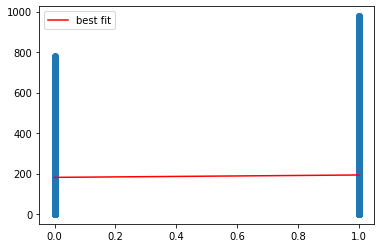

In [ ]:
plt.pyplot.scatter(df.workingday, df.cnt)
plt.pyplot.plot(df.workingday, df.workingday*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label="best fit")
plt.pyplot.legend()

All the regression code in one place



In [ ]:
#@title  All the regression code in one place

# test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


0.0008331677722468456

r-square observations of Regression with one variable model. Attached pic

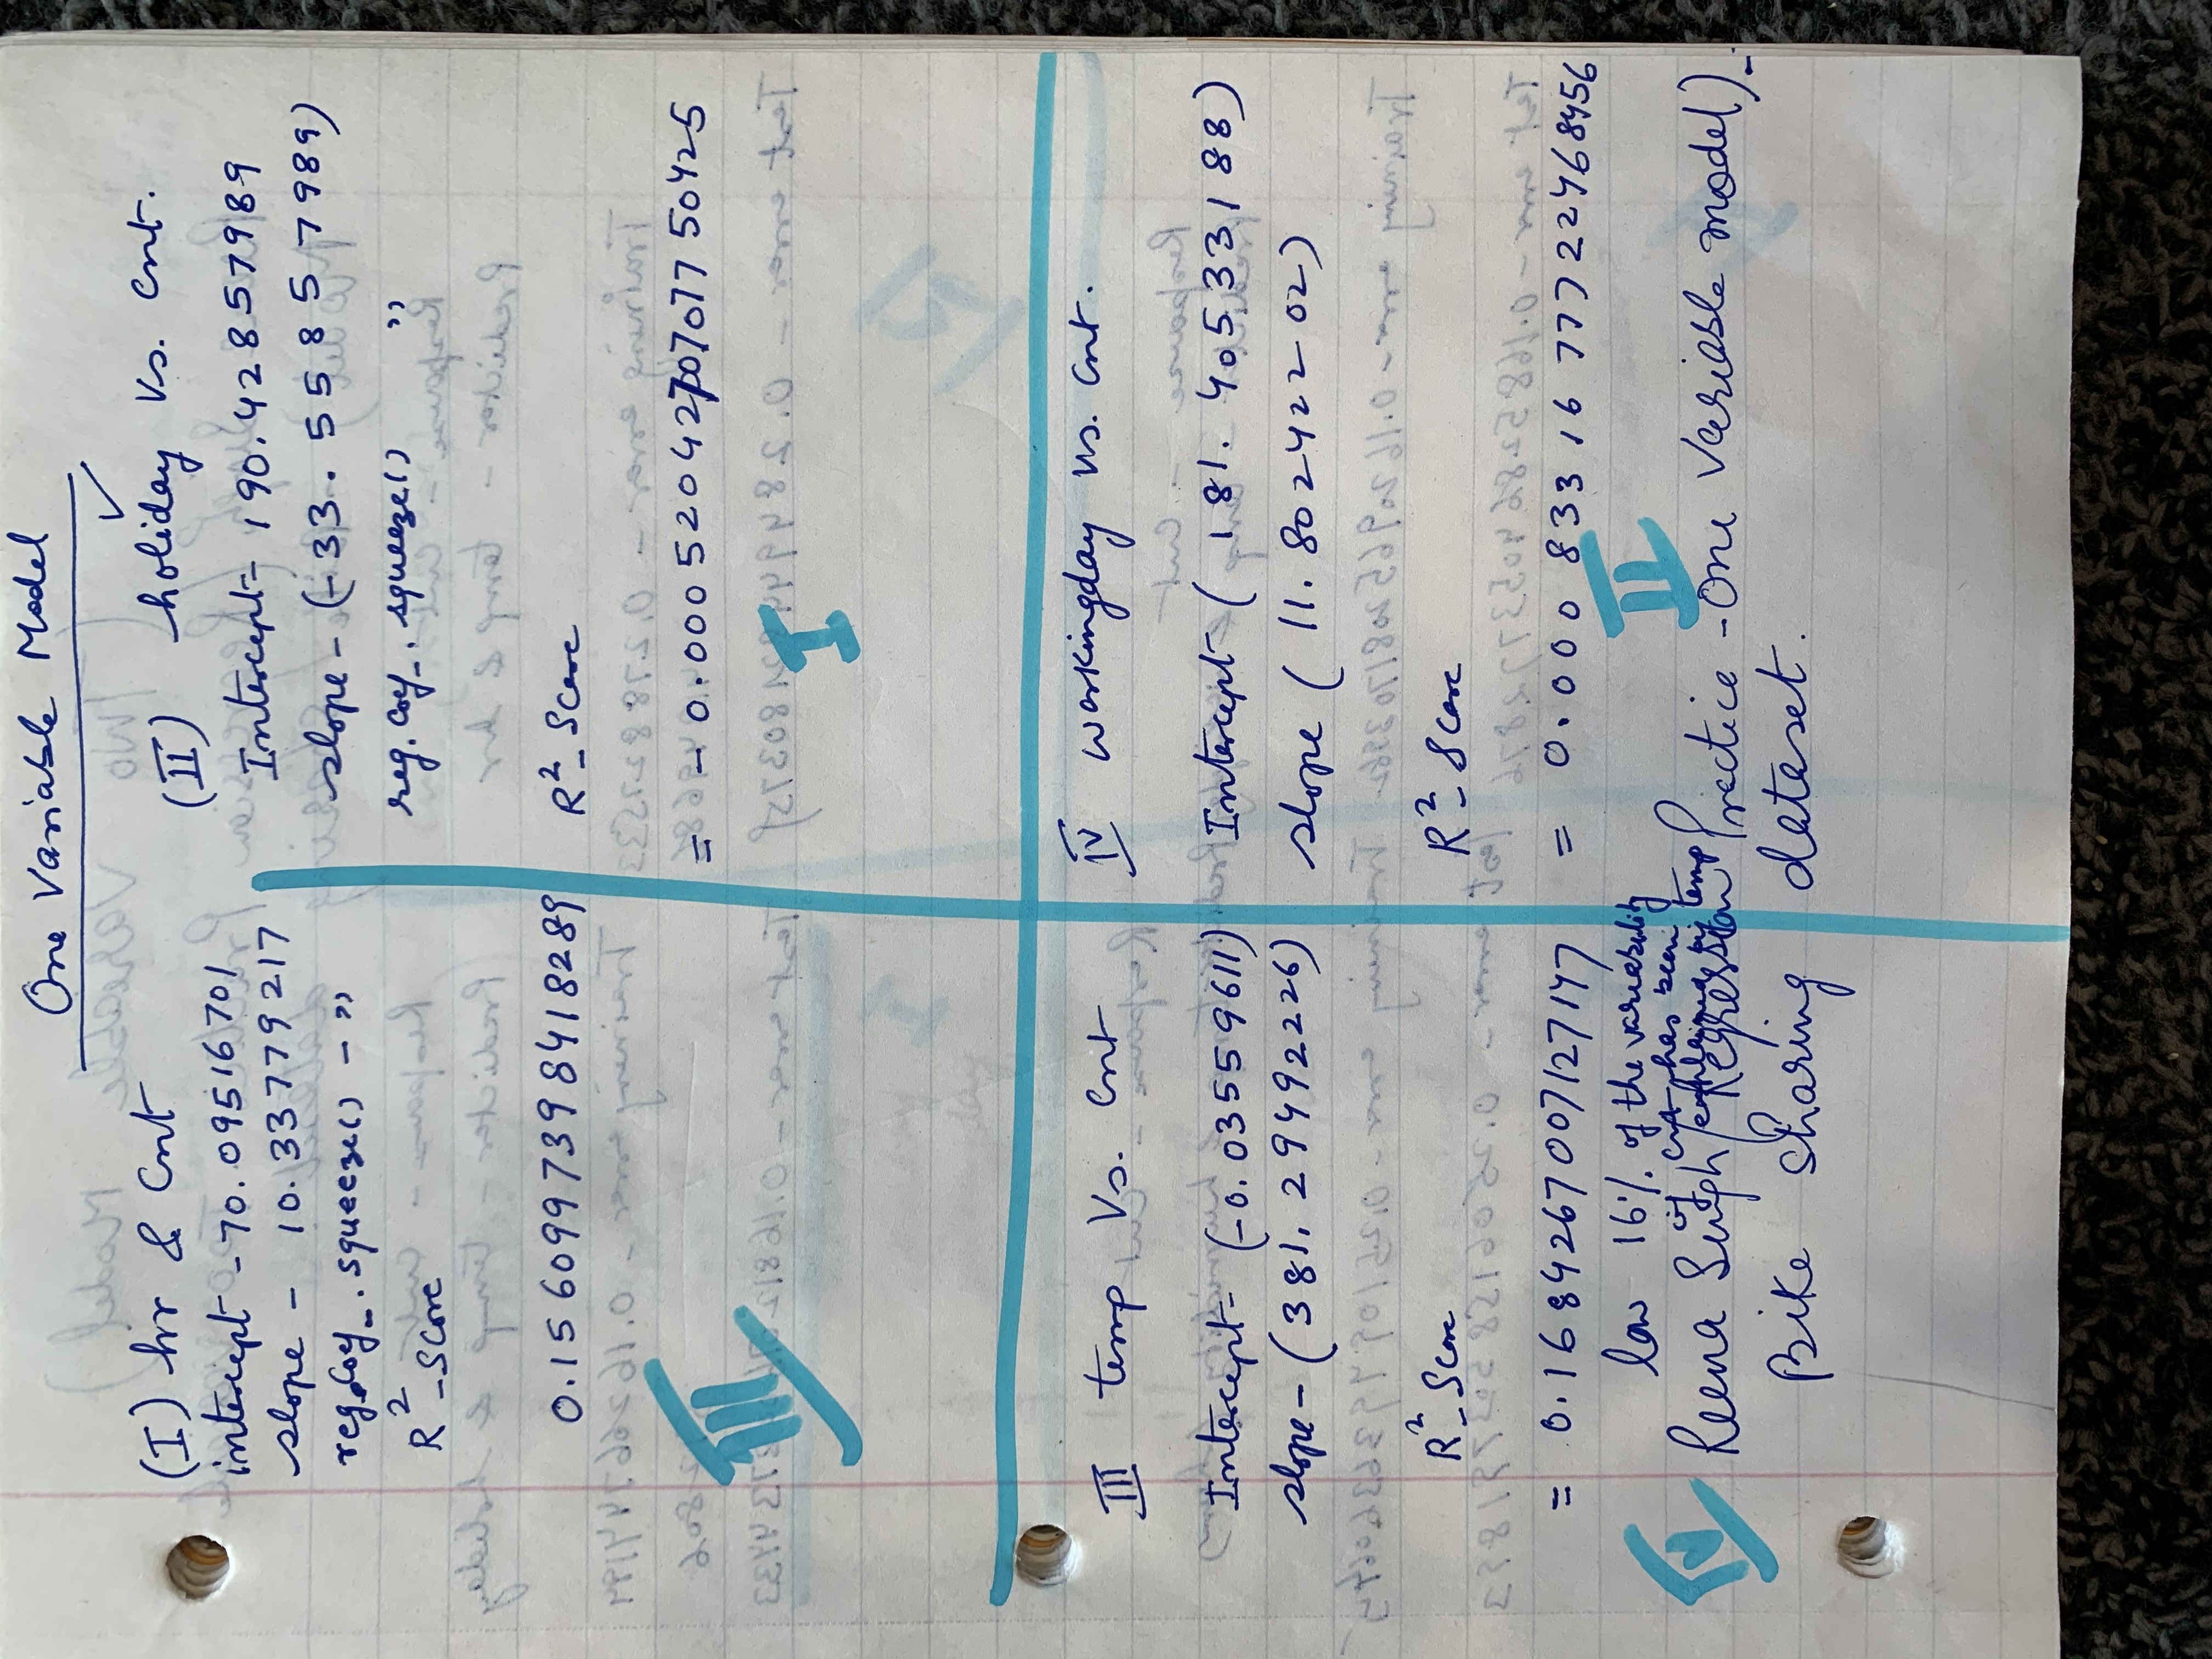

Two variable Regression

First observation

In [ ]:
Y = df[['cnt']]
X = df[['temp', 'hr']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [-81.06408494]
slope [[333.41790122   8.99187017]]


Calculate training error. A very high r2 score or a low mean squared error indicates overfit to training data.

In [ ]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.27882753341349686

Calculate the test error. A low r2 score indicates a not-so-good model.

In [ ]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.284944821803759

Second observation

In [ ]:
Y = df[['cnt']]
X = df[['temp', 'holiday']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [2.03013033]
slope [[376.94441105 -26.2663466 ]]


Calculate training error. A very high r2 score or a low mean squared error indicates overfit to training data.

In [ ]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.16266744194512806

Calculate the test error. A low r2 score indicates a not-so-good model.

In [ ]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.16812076008734433

Third observation

In [ ]:
Y = df[['cnt']]
X = df[['temp', 'workingday']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [-0.71308973]
slope [[377.23898742   2.66098535]]


Calculate training error. A very high r2 score or a low mean squared error indicates overfit to training data.

In [ ]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.16209652081703962

Calculate the test error. A low r2 score indicates a not-so-good model.

In [ ]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.16852864053772876

Fourth combination of predictors

In [ ]:
Y = df[['cnt']]
X = df[['temp', 'hum']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [184.57320547]
slope [[ 359.73792139 -278.27245192]]


Calculate training error. A very high r2 score or a low mean squared error indicates overfit to training data.

In [ ]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.2510949363606425

Calculate the test error. A low r2 score indicates a not-so-good model.

In [ ]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.2506158503791893

r-square observations of Regression with two-variable model. Attached pic.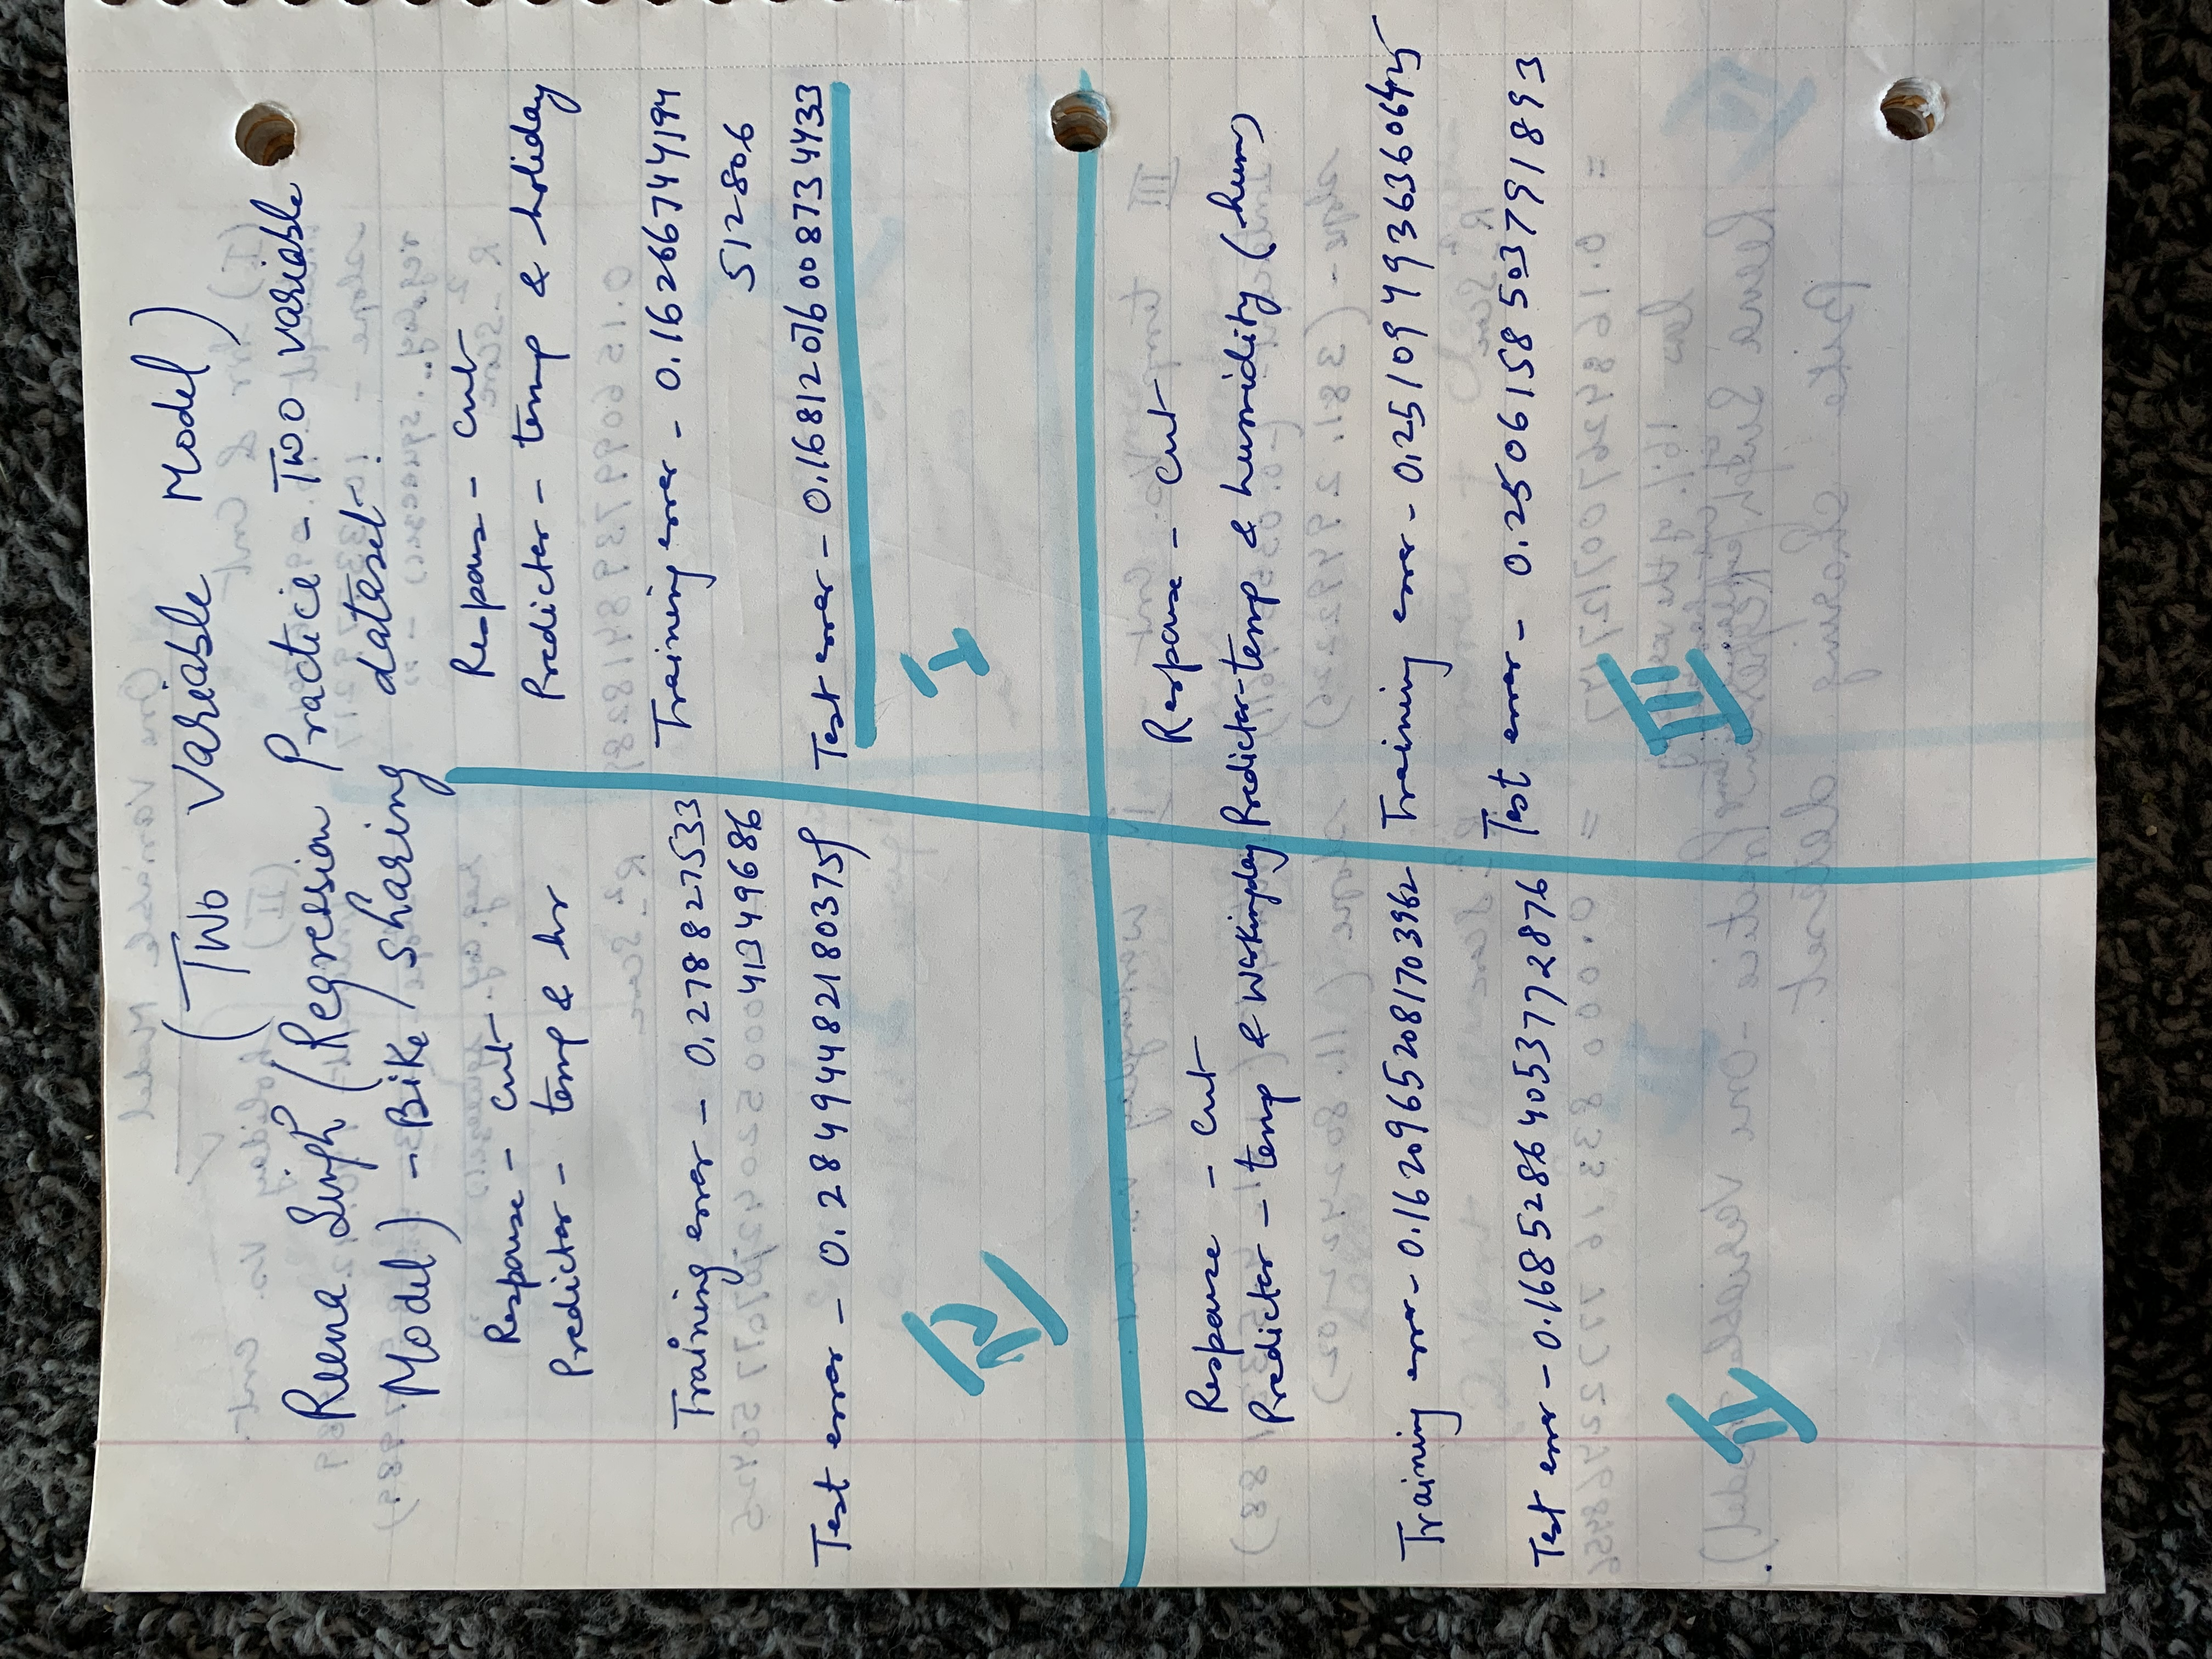

One Hot Encoding

Introduction

In computer science, data can be represented in a lot of different ways, and naturally, every single one of them has its advantages as well as disadvantages in certain fields.

Since computers are unable to process categorical data as these categories have no meaning for them, this information has to be prepared if we want a computer to be able to process it.

This action is called preprocessing. A big part of preprocessing is encoding - representing every single piece of data in a way that a computer can understand (the name literally means "convert to computer code").

In many branches of computer science, especially machine learning and digital circuit design, One-Hot Encoding is widely used.

What is One-Hot Encoding?

One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

For instance, [0, 0, 0, 1, 0] and [1 ,0, 0, 0, 0] could be some examples of one-hot vectors. A similar technique to this one, also used to represent data, would be dummy variables in statistics.

Each "0" is "false" and once we hit a "1" in a vector, the answer to the question is "true".

One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

Let's take a look at a simple example of how we can convert values from a categorical column in our dataset into their numerical counterparts, via the one-hot encoding scheme.

First method-One hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
hr_enc=enc.fit_transform(df[['hr']])

In [ ]:
type(hr_enc)

scipy.sparse.csr.csr_matrix

In [ ]:
from scipy.sparse import hstack
hstack([ hr_enc])

<17379x24 sparse matrix of type '<class 'numpy.float64'>'
	with 17379 stored elements in Compressed Sparse Row format>

First attempt at merging. Use the merge methods at csr_matrix.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()

mnth_enc = enc.fit_transform(df[['mnth']])
season_enc = enc.fit_transform(df[['season']])
hr_enc=enc.fit_transform(df[['hr']])

In [ ]:
type(mnth_enc)

scipy.sparse.csr.csr_matrix

In [ ]:
type(season_enc)

scipy.sparse.csr.csr_matrix

In [ ]:
type(hr_enc)

scipy.sparse.csr.csr_matrix

In [ ]:
from scipy.sparse import hstack
hstack([mnth_enc, season_enc, hr_enc])

<17379x40 sparse matrix of type '<class 'numpy.float64'>'
	with 52137 stored elements in COOrdinate format>

Second method: convert to dataframe

In [ ]:
mnth_df = pd.DataFrame.sparse.from_spmatrix(mnth_enc)
season_df = pd.DataFrame.sparse.from_spmatrix(season_enc)
hr_df = pd.DataFrame.sparse.from_spmatrix(hr_enc)
mnth_df.shape, season_df.shape , hr_df.shape

((17379, 12), (17379, 4), (17379, 24))

In [ ]:
pd.concat([ mnth_df, season_df, hr_df], axis = 1)

0    1    2    3    4    5    6   ...   17   18   19   20   21   22   23
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
17374  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
17375  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0
17376  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
17377  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0
17378  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0

[17379 rows x 40 columns]

Third way: use column transformer utility from scikit

In [ ]:
enc.fit_transform(df[['mnth', 'season','hr']])

<17379x40 sparse matrix of type '<class 'numpy.float64'>'
	with 52137 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()


ct = make_column_transformer(
    (ohe, ['mnth', 'hr' ]),
    ('passthrough', ['season']) )
X = ct.fit_transform(df)
# notice that season is moved to the end because of the order in the column transformer.
pd.DataFrame.sparse.from_spmatrix(X)

0    1    2    3    4    5    6   ...   30   31   32   33   34   35   36
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
17374  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0
17375  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0
17376  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0
17377  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  1.0
17378  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  1.0

[17379 rows x 37 columns]

Fourth way:Encoding Categorical Features

To convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

Example-1

In [ ]:
from sklearn import preprocessing

enc=preprocessing.OneHotEncoder()
yr = [0, 1]
season = [1,2,3,4]
hr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
enc = preprocessing.OneHotEncoder(categories=[yr,season,hr])
 
X = [[0,1,0], [1,2,4]]
print(enc.fit(X))

enc.transform([[1,3,1]]).toarray()

OneHotEncoder(categories=[[0, 1], [1, 2, 3, 4],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                           16, 17, 18, 19, 20, 21, 22, 23]])


array([[0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Example-2

In [ ]:
from sklearn import preprocessing

enc=preprocessing.OneHotEncoder()
yr = [0, 1]
season = [1,2,3,4]
mnth = [1,2,3,4,5,6,7,8,9,10,11,12]
enc = preprocessing.OneHotEncoder(categories=[yr,season,mnth])
 
X = [[0,2,5], [1,4,10]]
print(enc.fit(X))

enc.transform([[1,3,11]]).toarray()

OneHotEncoder(categories=[[0, 1], [1, 2, 3, 4],
                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])


array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.]])

Since one-hot encoding is very simple, it is easy to understand and use in practice. It's no surprise that it is this popular in the world of computer science.Due to the fact that the cons aren't too bad, its seen wide application. At the end of the day, its pros clearly outweigh the cons, which is why this type of implementation will definitely stick around for a long time in the future.

Forward and Backward Selection

Forward and backward selection works with sklearn version 0.24 onwards.

Please update the sklearn, see the first codeblock in this colab.

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, numpy, joblib, threadpoolctl
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


Forward Selection

Forward Selection chooses a subset of the predictor variables for the final model.

We can do forward stepwise in context of linear regression whether n is less than p or n is greater than p.

Forward selection is a very attractive approach, because it's both tractable and it gives a good sequence of models.

Start with a null model. The null model has no predictors, just one intercept (The mean over Y).
Fit p simple linear regression models, each with one of the variables in and the intercept. So basically, you just search through all the single-variable models the best one (the one that results in the lowest residual sum of squares). You pick and fix this one in the model.
Now search through the remaining p minus 1 variables and find out which variable should be added to the current model to best improve the residual sum of squares.
Continue until some stopping rule is satisfied, for example when all remaining variables have a p-value above some threshold.

In [ ]:
Y = df[['cnt']]
X = df[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [ ]:
# only available in sklearn version 0.24 and above
# This code is modified from scikit's user guide

from sklearn.feature_selection import SequentialFeatureSelector
from time import time

import sklearn.linear_model as linear_module

model = linear_module.LinearRegression()

reg = model.fit(X_train, y_train)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=2,
                                        direction='forward').fit(X_train, y_train)
toc_fwd = time()
sfs_forward.get_support()
toc_fwd = time()
print(toc_fwd)




1622934924.8902092


In [ ]:
X.columns[sfs_forward.get_support()]

Index(['casual', 'registered'], dtype='object')

In [ ]:
sfs_forward.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator': LinearRegression(),
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'n_features_to_select': 2,
 'n_jobs': None,
 'scoring': None}

Backward Selection

Unlike forward stepwise selection, it begins with the full least squares model containing all p predictors, and then iteratively removes the least useful predictor, one-at-a-time.

In order to be able to perform backward selection, we need to be in a situation where we have more observations than variables because we can do least squares regression when n is greater than p. If p is greater than n, we cannot fit a least squares model. It's not even defined.

Start with all variables in the model.
Remove the variable with the largest p-value | that is, the variable that is the least statistically significant.
The new (p - 1)-variable model is t, and the variable with the largest p-value is removed.
Continue until a stopping rule is reached. For instance, we may stop when all remaining variables have a significant p-value defined by some significance threshold.


In [ ]:
# only available in sklearn version 0.24 and above
# This code is modified from scikit's user guide

from sklearn.feature_selection import SequentialFeatureSelector
from time import time
import sklearn.linear_model as linear_module

model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(reg,
                                        direction='backward').fit(X_train, y_train)
toc_bwd = time()

sfs_backward.get_support()
toc_bwd = time()

print(toc_bwd)



1622935490.2946079


In [ ]:
X.columns[sfs_backward.get_support()]

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [ ]:
sfs_backward.get_params()

{'cv': 5,
 'direction': 'backward',
 'estimator': LinearRegression(),
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'n_features_to_select': None,
 'n_jobs': None,
 'scoring': None}

Ridge regression

In [ ]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

Y = df[['cnt']]
X = df[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


regressor = Ridge(alpha=0.5)
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

1.0

In [ ]:
reg.intercept_

array([2.84217094e-14])

In [ ]:
reg.coef_

array([[ 1.18951777e-14, -1.15463195e-14,  2.88657986e-15,
        -2.61092824e-15, -8.51109547e-15,  1.98658364e-15,
        -1.05940105e-14, -2.97721917e-16,  1.13572346e-13,
        -2.39806439e-13,  6.36606653e-14, -7.81059245e-15,
         1.00000000e+00,  1.00000000e+00]])

Ridge with Cross validation and multiple alphas

In [ ]:
from sklearn.linear_model import RidgeCV

Y = df[['cnt']]
X = df[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


ridge_regressor = RidgeCV(cv=5, alphas = [0.01,0.1, 0.5])
ridge_regressor.fit(X_train,y_train)
y_predict = ridge_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

1.0

In [ ]:
ridge_regressor.coef_

array([[ 6.36602430e-10,  4.48816396e-09, -4.06176353e-11,
         5.83502158e-10, -6.54548082e-09,  4.44088437e-10,
        -2.21749392e-08,  1.46687356e-09,  3.29529882e-08,
         3.37506736e-08, -4.08327614e-08,  3.34289399e-10,
         9.99999999e-01,  1.00000000e+00]])

In [ ]:
ridge_regressor.alpha_

0.01

Lasso regression

In [ ]:
from sklearn.linear_model import LassoCV
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000 ])
lasso_regressor.fit(X_train,y_train)
y_predict = lasso_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9999999999998986

In [ ]:
lasso_regressor.alpha_

0.001

In [ ]:
lasso_regressor.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.99999862,  1.00000019])

Graphs 

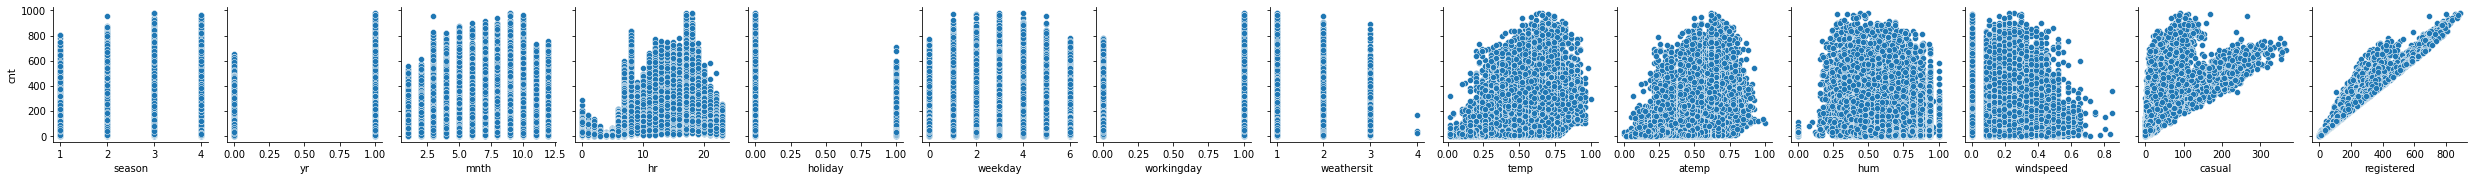

In [ ]:
sns.pairplot(df, y_vars='cnt', x_vars=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered'])

Final Conclusion of the Bike dataset project:-

R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

R-square is a comparison of residual sum of squares (SSres) with total sum of squares(SStot). Total sum of squares is calculated by summation of squares of perpendicular distance between data points and the average line.

Residual sum of squares in calculated by the summation of squares of perpendicular distance between data points and the best fitted line.

Where SSres is the residual sum of squares and SStot is the total sum of squares.

The goodness of fit of regression models can be analyzed on the basis of R-square method. The more the value of r-square near to 1, the better is the model.

Note : The value of R-square can also be negative when the models fitted is worse than the average fitted model.

Limitation of using R-square method –

The value of r-square always increases or remains same as new variables are added to the model, without detecting the significance of this newly added variable (i.e value of r-square never decreases on addition of new attributes to the model). As a result, non-significant attributes can also be added to the model with an increase in r-square value.
This is because SStot is always constant and regression model tries to decrease the value of SSres by finding some correlation with this new attribute and hence the overall value of r-square increases, which can lead to a poor regression model.

In bike dataset, I calculate the r-square with regression with one variable , regression with two variables, forward selection, backward selection, ridge and lasso. I observe the Ridge model shows r-square value is equal to 1.0. Thus, R2 = 1 indicates that the fitted model explains all variability in. That is why it is a fit model.

